# ISTANBUL AIRBNB PRICE PREDICTION
![https://cdns.klimg.com/dream.co.id/resized/640x320/news/2019/10/18/120288/menyusuri-istanbul-ibu-kota-tiga-kekaisaran-terbesar-dunia-1910189.jpg](https://cdns.klimg.com/dream.co.id/resized/640x320/news/2019/10/18/120288/menyusuri-istanbul-ibu-kota-tiga-kekaisaran-terbesar-dunia-1910189.jpg)

In [1]:
## Import Common Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

[Dataset Source](https://www.kaggle.com/datasets/ocakhsn/istanbul-airbnb-dataset)

In [2]:
## Import Dataset
df = pd.read_csv('listings.csv', index_col=0)
## Show Dataset
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,2009-06-01,0.01,1,365
20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2018-11-07,0.33,2,279
27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,2018-05-04,0.19,1,289
28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,761,3,0,NaN,NaN,19,365
28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,NaN,NaN,1,88


<hr>

## 1. Data Understanding and Data Wrangling

In [3]:
## Show Columns Information
df.info()
## Result: We detected missing value of few of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23728 entries, 4826 to 43970934
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            23674 non-null  object 
 1   host_id                         23728 non-null  int64  
 2   host_name                       23727 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   23728 non-null  object 
 5   latitude                        23728 non-null  float64
 6   longitude                       23728 non-null  float64
 7   room_type                       23728 non-null  object 
 8   price                           23728 non-null  int64  
 9   minimum_nights                  23728 non-null  int64  
 10  number_of_reviews               23728 non-null  int64  
 11  last_review                     11353 non-null  object 
 12  reviews_per_month         

In [4]:
## Confirm Missing Value
df.isna().sum()

name                                 54
host_id                               0
host_name                             1
neighbourhood_group               23728
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12375
reviews_per_month                 12375
calculated_host_listings_count        0
availability_365                      0
dtype: int64

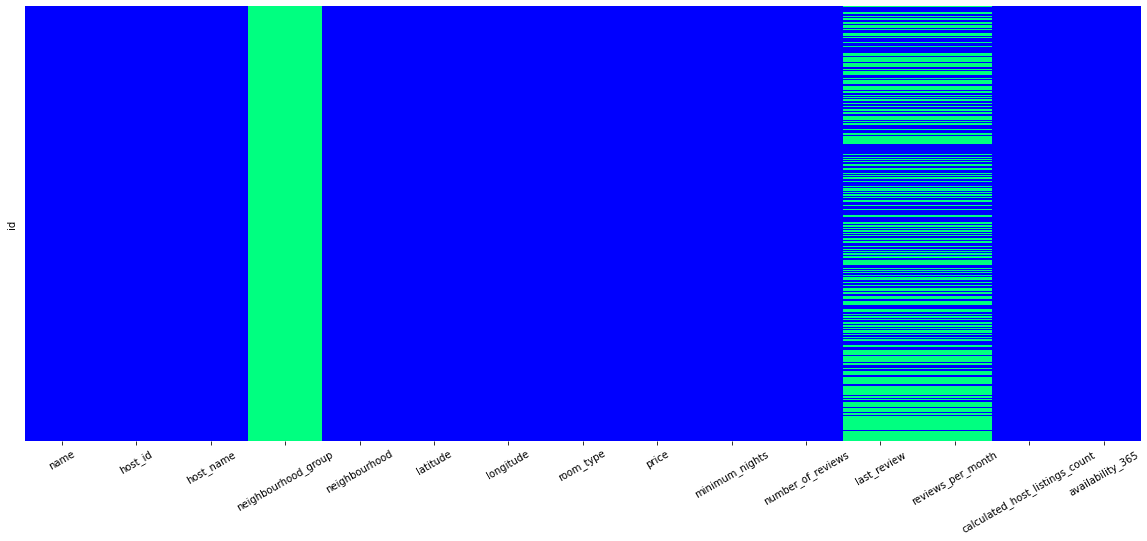

In [5]:
## Visualize Missing Value with Heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.isna(), cmap='winter', cbar=False, yticklabels=False)
plt.xticks(rotation=30)
plt.show()

In [6]:
## Describe Numerical Column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,23728.0,1.493973e+08,1.155452e+08,6603.00000,3.285440e+07,1.477727e+08,2.588145e+08,3.522041e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,23728.0,4.102842e+01,4.571288e-02,40.81396,4.100512e+01,4.103185e+01,4.104853e+01,4.147903e+01
longitude,23728.0,2.898211e+01,1.275031e-01,28.01901,2.897321e+01,2.898349e+01,2.902005e+01,2.990778e+01
price,23728.0,4.846432e+02,1.973884e+03,0.00000,1.370000e+02,2.470000e+02,4.460000e+02,7.692200e+04
minimum_nights,23728.0,4.525202e+00,2.761419e+01,1.00000,1.000000e+00,1.000000e+00,3.000000e+00,1.125000e+03
number_of_reviews,23728.0,7.870828e+00,2.322913e+01,0.00000,0.000000e+00,0.000000e+00,4.000000e+00,3.450000e+02
reviews_per_month,11353.0,7.101770e-01,9.029131e-01,0.01000,1.300000e-01,3.300000e-01,9.500000e-01,9.200000e+00
calculated_host_listings_count,23728.0,5.861767e+00,1.653537e+01,1.00000,1.000000e+00,2.000000e+00,5.000000e+00,1.760000e+02
availability_365,23728.0,2.277099e+02,1.466071e+02,0.00000,8.900000e+01,3.020000e+02,3.650000e+02,3.650000e+02


In [7]:
## We drop neighbourhood_group since it didn't contain any data
df.drop(columns='neighbourhood_group', inplace=True)

In [8]:
# Describe Data
istanbulDesc=[]
for i in df.columns:
    istanbulDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/len(df))*100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(istanbulDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
])

## Result: we have 14 columns, 5 of them are objects while the rest have data type of either float or integer
### last_review and reviews_per_month have null row above 50% of its value, while name has 54 missing values.

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,name,object,54,0.23,22690,"[Condo with 3 bedroom at Fulya, Mecidiyeköy, G..."
1,host_id,int64,0,0.00,14450,"[166793960, 201770922]"
2,host_name,object,1,0.00,4907,"[Elisabeth, Benan]"
3,neighbourhood,object,0,0.00,39,"[Kagithane, Cekmekoy]"
4,latitude,float64,0,0.00,10858,"[40.99274, 41.04471]"
5,longitude,float64,0,0.00,12458,"[28.84544, 28.71335]"
6,room_type,object,0,0.00,4,"[Shared room, Hotel room]"
7,price,int64,0,0.00,501,"[1995, 76922]"
8,minimum_nights,int64,0,0.00,65,"[65, 140]"
9,number_of_reviews,int64,0,0.00,230,"[77, 173]"


### Feature Selection

#### Correlation

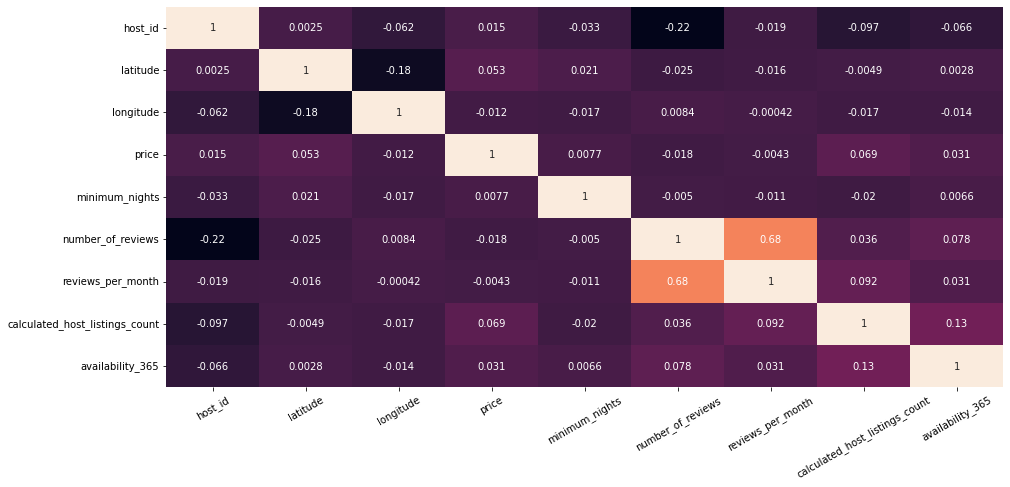

In [9]:
## Visualize Correlation with Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.xticks(rotation=30);

Correlation score between features to target column are low, no single feature having correlation score above 0.1 towards target (Price.)

#### Correlation Ratio

In [10]:
## Import Package
from dython.nominal import correlation_ratio, associations, cramers_v, theils_u

In [11]:
## Check Columns Name
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [12]:
## Check Column's Data Type
df.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
## Define categorical columns
col = ['neighbourhood', 'room_type']
## name, host_name and last_review should not affect room price

In [14]:
## Check Correlation Ratio
correlation_ratio( df['neighbourhood'], df['price'])
## Low Correlation

0.09322055112585757

In [15]:
## Check Correlation Ratio
correlation_ratio( df['room_type'], df['price'])
## Low Correlation

0.09384584837754228

### Encoding

In [16]:
## Build new DataFrame with numerical features and target
df_1 = df[['neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price']]
## Show Dataframe
df_1.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
id,,,,,,,,
4826,Uskudar,Entire home/apt,1,1,0.01,1,365,720
20815,Besiktas,Entire home/apt,365,41,0.33,2,279,816
27271,Beyoglu,Entire home/apt,30,13,0.19,1,289,233
28277,Sisli,Hotel room,3,0,NaN,19,365,761
28318,Sariyer,Entire home/apt,3,0,NaN,1,88,823


#### `neighbourhood`

In [17]:
## Top 10 area/neighbourhood with the highest mean of airBnB room price in Istanbul
df_1[['neighbourhood', 'price']].groupby('neighbourhood').mean().round(2).sort_values('price', ascending=False).head(10)

,price
neighbourhood,
Beykoz,1594.42
Buyukcekmece,1063.28
Adalar,981.46
Sariyer,912.64
Catalca,906.56
Kucukcekmece,870.50
Silivri,833.40
Arnavutkoy,781.71
Sile,721.76


Room price in Beykoz, Buyukcemece and Adalar neighbourhoods has substantially higher mean price than mean of the airBnB room price in any other area in Istanbul. Therefore we use Re-Categorize of values in `neighbourhood` column to top 3 neighbourhoods with the highest mean room price, and other areas as Others. 

In [18]:
## Build function for Re-Categorize
def recat_area(x):
    if x in ['Beykoz', 'Buyukcekmece', 'Adalar']:
        return x
    else:
        return 'Others'

In [19]:
## Run Function
df_1['neighbourhood']=df['neighbourhood'].apply(recat_area)
## Show Data
df_1.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
id,,,,,,,,
4826,Others,Entire home/apt,1,1,0.01,1,365,720
20815,Others,Entire home/apt,365,41,0.33,2,279,816
27271,Others,Entire home/apt,30,13,0.19,1,289,233
28277,Others,Hotel room,3,0,NaN,19,365,761
28318,Others,Entire home/apt,3,0,NaN,1,88,823


#### `reviews_per_month`

In [20]:
## Recheck Missing Value
df_1.isna().sum()

neighbourhood                         0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 12375
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [21]:
## Fill Missing Value with 0 as NaN value means no review
df_1['reviews_per_month'] = df_1['reviews_per_month'].fillna(0)

In [22]:
## Recheck Missing Value
df_1.isna().sum()

neighbourhood                     0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price                             0
dtype: int64

#### Encode `neighbourhood` and `room_type`

In [23]:
## Decode both columns with One-Hot Encoding
df_1 = pd.get_dummies(df_1, columns=['neighbourhood', 'room_type'])
## Show Data
df_1.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,neighbourhood_Adalar,neighbourhood_Beykoz,neighbourhood_Buyukcekmece,neighbourhood_Others,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,
4826,1,1,0.01,1,365,720,0,0,0,1,1,0,0,0
20815,365,41,0.33,2,279,816,0,0,0,1,1,0,0,0
27271,30,13,0.19,1,289,233,0,0,0,1,1,0,0,0
28277,3,0,0.00,19,365,761,0,0,0,1,0,1,0,0
28318,3,0,0.00,1,88,823,0,0,0,1,1,0,0,0


<hr>

## 2. Machine Learning Modelling

### Splitting Data

In [24]:
## Import Package
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [25]:
## Define Features and Target
x = df_1.drop(columns='price')
y = df_1['price']

In [26]:
## Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [27]:
## Check shape of features
print(x_train.shape, x_test.shape)

(18982, 13) (4746, 13)


In [28]:
## Build function to automatically perform Evaluation Matrix scoring
def Eva_Matrix(model,x_train, x_test, y_train, y_test, Nama):

    Model = model.fit(x_train, y_train)

    y_pred_tr = Model.predict(x_train)
    R2_train = r2_score(y_train, y_pred_tr)
    MAE_train = mean_absolute_error(y_train, y_pred_tr)
    MSE_train = mean_squared_error(y_train, y_pred_tr)
    RMSE_train = np.sqrt(MSE_train)

    y_pred_ts = Model.predict(x_test)
    R2_test = r2_score(y_test, y_pred_ts)
    MAE_test = mean_absolute_error(y_test, y_pred_ts)
    MSE_test = mean_squared_error(y_test, y_pred_ts)
    RMSE_test = np.sqrt(MSE_test)

    eva_data = {
    "Training " + Nama : [R2_train, MAE_train, MSE_train, RMSE_train],
    "Testing " + Nama : [R2_test, MAE_test, MSE_test, RMSE_test],
    }
    
    df = pd.DataFrame(eva_data, index=['R2', 'MAE', 'MSE', 'RMSE']).T.round(2)
    
    return df

In [29]:
## Run Function for Evaluation Matrix scoring for Base KNN Model
df_KNN = Eva_Matrix(KNeighborsRegressor(),
                    x_train, x_test, y_train, y_test,
                    'KNN')
df_KNN
## Stable but score is not desirable

,R2,MAE,MSE,RMSE
Training KNN,0.35,320.65,2449305.46,1565.03
Testing KNN,0.35,381.12,2912962.90,1706.74


In [30]:
## Run Function for Evaluation Matrix scoring for Base SVR Model
df_SVM = Eva_Matrix(SVR(),
                    x_train, x_test, y_train, y_test,
                    'SVM')
df_SVM
## Underfit

,R2,MAE,MSE,RMSE
Training SVM,-0.01,333.85,3797766.47,1948.79
Testing SVM,-0.01,366.08,4538513.14,2130.38


In [31]:
## Run Function for Evaluation Matrix scoring for Base Decision Tree Model
df_DT = Eva_Matrix(DecisionTreeRegressor(),
                    x_train, x_test, y_train, y_test,
                    'DT')
df_DT
## Overfit

,R2,MAE,MSE,RMSE
Training DT,0.80,142.87,748219.56,865.00
Testing DT,0.22,384.23,3510470.90,1873.63


In [32]:
## Run Function for Evaluation Matrix scoring for Base Decision Tree Model
df_RF = Eva_Matrix(RandomForestRegressor(),
                    x_train, x_test, y_train, y_test,
                    'RF')
df_RF
## Overfit

,R2,MAE,MSE,RMSE
Training RF,0.72,214.24,1042876.94,1021.21
Testing RF,0.25,361.19,3376943.90,1837.65


In summary, Base Model with KNN and SVM produce stable models, but score are not desirable. In the other hand, Decision Tree and Random Forest produce good training result but low score for testing set (overfit). No single Model show good score in this Base Model, therefore we need do further improvement by tuning.

<hr>

## 3. Tuning with GridSearch

### KNN

In [33]:
## Define parameter
param_KNN = {
    'n_neighbors' : range(1, 51, 2),
    'weights' : ['uniform', 'distance'],
    'p' : [1,2]
}

In [34]:
## Run GridSearch
KNN_GS = GridSearchCV(KNeighborsRegressor(),
                        param_KNN,
                        cv = KFold(n_splits=4), 
                        n_jobs = -1,
                        verbose = 1,
                        scoring = 'r2')
                        
## Fit Model
KNN_GS.fit(x_train,y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 51, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [35]:
## Define Best R-Squared Score and Best Combination
print('Best Tuning Score : ', KNN_GS.best_score_)
print('Best params : ', KNN_GS.best_params_)
## Add into variable for next testing
KNN_Tuned = KNN_GS.best_estimator_

Best Tuning Score :  0.07436060150546539
Best params :  {'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}


In [36]:
## Run Function for Evaluation Matrix scoring for KNN Model after Tuning
df_KNN_Tuned = Eva_Matrix(KNN_Tuned,
                    x_train, x_test, y_train, y_test,
                    'KNN Tuned')
df_KNN_Tuned
## Underfit

,R2,MAE,MSE,RMSE
Training KNN Tuned,0.14,357.81,3225771.48,1796.04
Testing KNN Tuned,0.13,401.48,3889277.36,1972.13


### SVM

In [37]:
## Define Parameter
param_SVM = {
    'C' : np.logspace(-3, 3, 7),
    'gamma' : np.arange(0 ,5 ,0.1)
}

In [38]:
## Run GridSearch
SVM_GS = GridSearchCV(SVR(max_iter=300),
                        param_SVM,
                        cv = KFold(n_splits=4), 
                        n_jobs = -1,
                        verbose = 1,
                        scoring = 'r2')
                        
## Fit Model
SVM_GS.fit(x_train,y_train)

Fitting 4 folds for each of 350 candidates, totalling 1400 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=SVR(max_iter=300), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])},
             scoring='r2', verbose=1)

In [39]:
## Define Best R-Squared Score and Best Combination
print('Best Tuning Score : ', SVM_GS.best_score_)
print('Best params : ', SVM_GS.best_params_)
## Add into variable for next testing
SVM_Tuned = SVM_GS.best_estimator_

Best Tuning Score :  -0.017421827808855928
Best params :  {'C': 1000.0, 'gamma': 0.1}


In [40]:
## Run Function for Evaluation Matrix scoring for SVM Model after Tuning
df_SVM_Tuned = Eva_Matrix(SVM_Tuned,
                    x_train, x_test, y_train, y_test,
                    'SVM Tuned')
df_SVM_Tuned
## Underfit

,R2,MAE,MSE,RMSE
Training SVM Tuned,-0.06,854.75,3983389.21,1995.84
Testing SVM Tuned,-0.05,887.81,4723813.27,2173.43


### Decision Tree

In [41]:
## Define Parameter
param_DT = {
    'max_depth' : np.arange(1, 20), ## 19 values
    'min_samples_split' : np.arange(2, 20), ## 18 values
    'min_samples_leaf' : np.arange(1, 20), ## 19 values
    'max_features' : np.arange(0.1, 1, 0.1) ## 9 values
}

** `RANDOMIZED SEARCH`** vs Grid Search
- Use Randomized Search if data are overwhelmingly huge
- Use Randomized Search if Algorithm has many hyper parameters
- GridSearch guaranteed best score from every possible combination, while Randomized Search didn't
- Computation for GridSearch is heavy because every combination must be tested, while Randomized Search randomly choose total of combination desired by user from every possible combination
- Fine Tuning on GridSearch perform by changing range of hyperparameter, while in Randomized Search we can change number of Iteration and change the range of hyperparameter at the same time.


In [42]:
19 * 18 * 19 * 9 * 4
# max depth
# min samples split
# min sample leaf
# max features
# kfold

233928

If we use GridSearch for this computation, Machine will run 233,928 combinations and will put a lot of load to computer's processor. Meanwhile when using Randomized Search, we can determine how much iteration (samples) from the total combination, randomly, to be computed by computer.

In [43]:
## Run Randomize Search
DT_RS = RandomizedSearchCV(DecisionTreeRegressor(),
                            param_DT,
                            cv = KFold(n_splits=4), 
                            n_jobs = -1,
                            verbose = 1,
                            scoring = 'r2',
                            n_iter = 200,
                            random_state = 42)
                        
## Fit Model
DT_RS.fit(x_train,y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=DecisionTreeRegressor(), n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
                   random_state=42, scoring='r2', verbose=1)

In [44]:
## Define Best R-Squared Score and Best Combination
print('Best Tuning Score : ', DT_RS.best_score_)
print('Best params : ', DT_RS.best_params_)
## Add into variable for next testing
DT_Tuned = DT_RS.best_estimator_

Best Tuning Score :  0.09613986808815783
Best params :  {'min_samples_split': 12, 'min_samples_leaf': 19, 'max_features': 0.5, 'max_depth': 11}


In [45]:
## Run Function for Evaluation Matrix scoring for Decision Tree Model after Tuning
df_DT_Tuned = Eva_Matrix(DT_Tuned,
                            x_train, x_test, y_train, y_test,
                            'DT Tuned')
df_DT_Tuned
## Underfit

,R2,MAE,MSE,RMSE
Training DT Tuned,0.14,358.59,3221632.09,1794.89
Testing DT Tuned,0.10,371.97,4011609.66,2002.90


### Random Forest

In [46]:
## Define Parameter
param_RF = {
    'n_estimators' : np.arange(100, 10000, 50), ## 1980 values
    'max_depth' : np.arange(1, 20), # 19 values
    'min_samples_split' : np.arange(2, 20), ## 18 values
    'min_samples_leaf' : np.arange(1, 20), ## 19 values
    'max_features' : np.arange(0.1, 1, 0.1) ## 9 values
}

In [47]:
1980 * 19 * 18 * 19 * 9 * 4
# n_estimators
# max depth
# min samples split
# min sample leaf
# max features
# kfold

463177440

If we use GridSearch for this computation, Machine will run 463,177,440 combinations and will put a lot of load to computer's processor. Meanwhile when using Randomized Search, we can determine how much iteration (samples) from the total combination, randomly, to be computed by computer.

In [48]:
## Run Randomize Search
RF_RS = RandomizedSearchCV(RandomForestRegressor(),
                            param_RF,
                            cv = KFold(n_splits=4), 
                            n_jobs = -1,
                            verbose = 1,
                            scoring = 'r2',
                            n_iter = 300,
                            random_state = 42)
                        
## Fit Model
RF_RS.fit(x_train,y_train)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(), n_iter=300, n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19...
       6700, 6750, 6800, 6850, 6900, 6950, 7000, 7050, 7100, 7150, 7200,
       7250, 7300, 7350, 7400, 7450, 7500, 7550, 7600, 7650, 7700, 7750,
       7800, 7850, 7900, 7950, 8000, 8050, 8100, 8150, 8200, 8250, 8300,
       8350, 8400, 8450, 8500, 8550, 8600, 8650, 8700, 8750, 8800, 8850,
       8900, 8950, 9000, 9050, 9100, 9150, 9200, 9250, 9300, 9350, 9400,
       9450, 9500, 9550, 9600, 9650, 9700, 9750, 9800, 9850, 9900, 9950])},
                   random_state=42, scoring='r2', verbose=1)

In [49]:
## Define Best R-Squared Score and Best Combination
print('Best Tuning Score : ', RF_RS.best_score_)
print('Best params : ', RF_RS.best_params_)
## Add into variable for next testing
RF_Tuned = RF_RS.best_estimator_

Best Tuning Score :  0.18073596794527064
Best params :  {'n_estimators': 5950, 'min_samples_split': 11, 'min_samples_leaf': 4, 'max_features': 0.9, 'max_depth': 16}


In [50]:
## Run Function for Evaluation Matrix scoring for Random Forest Model after Tuning
df_RF_Tuned = Eva_Matrix(RF_Tuned,
                            x_train, x_test, y_train, y_test,
                            'RF Tuned')
df_RF_Tuned
## Underfit

,R2,MAE,MSE,RMSE
Training RF Tuned,0.39,306.08,2294484.28,1514.76
Testing RF Tuned,0.23,355.26,3455854.23,1858.99
